# Методы обучения с учителем

Концепция "обучения с учителем" (Supervised Learning) в теории искусственного интеллекта и, в частности, в машинном обучении реализует естественный и понятный механизм обучения системы (биологической или технической) на основе передачи знаний от учителя к ученику в виде конкретных примеров "стимул-реакция".

Непосредственно в задаче машинного обучения данный подход подразумевает настройку параметров некоторой модели, реализующей, например, правило классификации или регрессии при обучении на примерах, представленными в виде набора входных сигналов (стимулов) и выходных (реакции). Т.е. набор данных при обучении с учителем подразумевает разделение на входные параметры $X$ - обычно свойства объектов, процессов, и выходные параметры $Y$ - правильный ответ системы $Y(X)$ 

### Алгоритм k ближайших соседей (K Nearest Neighbours - KNN)

Данный алгоритм решает **задачу классификации** произвольного объекта по принципу "ты есть то, чем являются твои соседи" (большинство соседей).

В основе алгоритма (как и большинства алгоритмов классификации) лежит **"гипотеза компактности"**, заключающая в предположении, что объекты, принаждежащие оному классу формируют компактные множества в пространстве признаков.


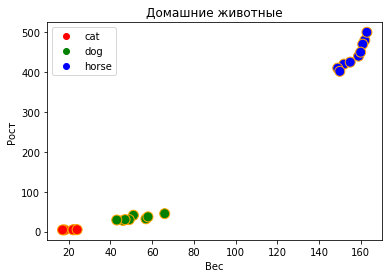

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

animals = pd.DataFrame({"weight": [32.1, 4.2, 4.9, 4.5, 45, 37, 41, 4.2, 420, 410, 425, 4.8, 30, 402, 28, 30, 29, 480, 500, 440, 470, 450 ], 
                        "height": [57, 18, 23, 22, 66, 58, 51, 17, 152, 149, 155, 24, 49, 150, 46, 47, 43, 162, 163, 159, 161, 160], 
                        "class": ["dog","cat","cat","cat","dog","dog","dog","cat","horse", "horse","horse", "cat", "dog", "horse","dog","dog","dog","horse","horse","horse","horse","horse" ]})
ordEnc = OrdinalEncoder()
animals["classEnc"] = ordEnc.fit_transform(animals[["class"]]).astype(int)
scat = plt.scatter(x = animals.height, y = animals.weight, c = animals.classEnc, cmap = ListedColormap(["red", "green", "blue"]), edgecolors = "orange", s = 100)
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Домашние животные")
plt.legend(handles=scat.legend_elements()[0], labels = list(ordEnc.categories_[0]))
plt.show()

Как можно видеть, объекты, в большинстве принадлежащие одному классу, имеют схожие свойства и поэтому образуют группы точек, близких друг к другу в пространстве признаков, при этом достаточно отстоящих от других групп. 

Но здесь так же могут быть исключения: некоторые породы собак по параметрам "рост" и "вес" неотличимы от кошек. Однако, это скорее, изъян постановки задачи и выбора пространства признаков, нежели самой гипеотезы компактности.


#### Рассмотрим наглядный пример работы метода на искусственом наборе данных

Сгенерируем 3 кучки точек (нормальным распределением) и наглядно рассмотрим работу улгоритма: 

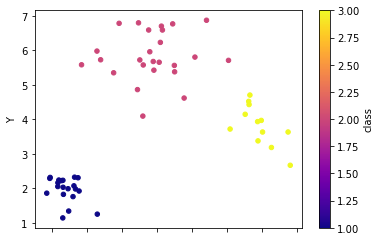

In [2]:

#первая кучка вокруг точки (2.5, 2)
x1 = np.random.normal(2.5, 0.3, 20)
y1 = np.random.normal(2.0, 0.3, 20)
dat = pd.DataFrame({"X": x1, "Y": y1, "class": 1})

#вторая кучка вокруг точки (5, 6)
x2 = np.random.normal(5.0, 1.0, 25)
y2 = np.random.normal(6.0, 1.0, 25)
add = pd.DataFrame({"X": x2, "Y": y2, "class": 2})
dat = pd.concat([dat, add], ignore_index = True)

#третья кучка вокруг точки (8, 4)
x3 = np.random.normal(8.0, .7, 12)
y3 = np.random.normal(4.0, .6, 12)
add = pd.DataFrame({"X": x3, "Y": y3, "class": 3})
dat = pd.concat([dat, add], ignore_index = True)

#dat.groupby(by = "class").agg([np.mean, np.std])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.show()


Задача состоит в определении, какому классу будет относиться новая произвольная точка, не входящая в исходный набор данных (*обучающую выборку*)


Координаты тестовой точки: [4.61711836 1.80044304]


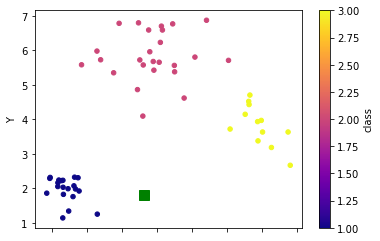

In [31]:
arbitrX = np.random.uniform(0,10,2)
#arbitrX = np.array([[6.5,5]])
print(f"Координаты тестовой точки: {arbitrX}")

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0], arbitrX[1], "gs", markersize = 10)
plt.show()

К какому классу отнести эту точку?

### KNeighborsClassifier (библиотека sklearn)

Методы биб-ки **sklearn** используют данные типа **numpy.array**

Если используем датасет **Pandas**, то необходимо преобразовать данные методом *to_numpy()*


Каждый объект в задаче машинного обучения представляет собой объединение свойств - объединение столбцов таблицы

Также важно следить за размерностями массивов

In [32]:
dat.head()

,X,Y,class
0,2.270467,2.224531,1
1,1.935367,2.289779,1
2,2.772715,1.923671,1
3,2.163533,2.053172,1
4,2.624945,2.074014,1


In [33]:
knnX = dat[["X","Y"]].to_numpy()
knnY = dat[["class"]].to_numpy()
print(knnX.shape)
print(knnY.shape)

(57, 2)
(57, 1)


Выходную переменную (метки классов) нужно преобразовать к одномерной структуре

Значение -1 в каком-либо измерении функции *reshape()* указывает на автоматический подсчет кол-ва элементов. В данном случае это аналогично *reshape(57)*

Тестовые данные требуется привести к форме обучающих данных. Для тестовой точки вызов *reshape(1,-1)* означает приведение массива [testx, testY] к двумерному виду [[testx, testY]], т.е. по первому измерению 1 элемент - сам массив с координатами точки, а по второму измерению -1 означает автоматический подбор по количеству координат (аналогично *reshape(1,2)*)

In [34]:
knnY = knnY.reshape(-1)
print(f"Y shape: {knnY.shape}")
arbitrX = arbitrX.reshape(1,-1)
print(f"Test X shape: {arbitrX.shape}")

Y shape: (57,)
Test X shape: (1, 2)


Предсказаный класс точки: [1]
3 ближайших соседей:
[[[3.293173   1.25295535]
  [2.77271473 1.92367076]
  [2.74251523 2.30818424]]]


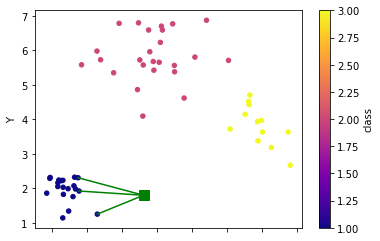

In [35]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 3
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

Для вычисления расстояний KNeighborsClassifier итспользует метрику Минковского с параметром по умолчанию $p=2$ - Евклидова метрика:

$\rho (x,y) = \left(\displaystyle\sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$

#### Насколько адекватно и корректно работает данная модель? Как проверить на известных данных?

В задачах машинного обучения помимо процедуры **обучения на данных**, выполняется процедура **проверки на тестовых данных**

Имеющийся набор данных, если не предоставляет готовое разбиение на обучающую и тестовую выборки (например MNIST), разбивают на **обучающую выборку** и **тестовую выборку**. 

Разбиение обычно выполняется в пропорциях 80% / 20%, 75% / 25% - большая часть примеров, очевидно, идет на обучение. При этом разбиения должны быть сбалансированы по количеству примеров каждого из классов. 

Для выборок независимых друг от друга объектов/наблюдений обычно делается случайная равномерная выборка.

Для временных рядов (когда считаем, что наблюдение в момент t зависит от предыдущих t-1, t-2,... наблюдений ) случайный сэмплинг недопустим. В этом случае берутся "непрерывные" интервалы или скользящие окна.

### train_test_split

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()

Для использования методов, использующих метрику, необходимо произвести нормализацию значений признаков

In [37]:
vMin = iris.data.min( axis = 0 )
x = (iris.data - vMin) / (iris.data.max( axis = 0 ) - vMin)

Разделим выборку на обучающую и тестовую 

In [38]:
xTrain, xTest, yTrain, yTest = train_test_split(x, iris.target, test_size = 0.33, shuffle = True)

In [39]:
irisKnn = KNeighborsClassifier(n_neighbors = 3)
irisKnn.fit(xTrain, yTrain)
yPred = irisKnn.predict(xTest)
yPred

array([1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       2, 2, 2, 0, 2, 2])

In [40]:
yTest

array([1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 2, 2])

In [41]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

Кол-во меток классов в тестовой: [15 19 16],
Кол-во меток классов в предсказании: [15 17 18]


Сопоставление результатов предсказания с фактическими метками - **Confusion Matrix** (матрица ошибок)

### Confusion Matrix

In [42]:
conMat = confusion_matrix(yTest, yPred )
conMat

array([[15,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 16]])

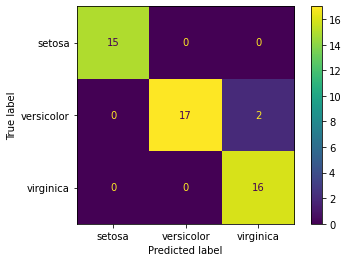

In [43]:
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat, display_labels = iris.target_names)
cmDisp.plot()
plt.show()

TP - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FP - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу (по горизонтали кроме диагонали)

TN - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)

FN - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса (по вертикали кроме диагонали)

Recall: $R = \frac{TP}{TP + FN}$ 

Precision: $P = \frac{TP}{TP + FP}$

Accuracy: $A = \frac{TP + TN}{Total values}$

F1-мера: $F1 = \frac{2 \cdot Recall \cdot Accuracy}{Recall + Accuracy}$

Recall для метки "1": $R_1 = \frac{21}{21 + 1} = 0.95$ (1 метка ложно-отрицательная FN, ложно исключили из класса)

Precision для метки "1": $P_1 = \frac{21}{21 + 0} = 1$ (нет ложно-положительных меток, нет ошибочно принятых в класс "1")

Precision для метки "2": $P_2 = \frac{17}{17 + 1} = 0.94$ (1 метка ложно-положительная FP, ложно приняли в класс)

In [44]:

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.89      0.94        19
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Задача регресии (K ближайших соседей)

Задача регрессии заключается в предсказании значения зависимой (целевой) переменной. Метод k ближайших соседей аналогично ищет наиболее близкие в смысле заданной метрики объекты в пространстве признаков, а затем интерполирует значения их зависимого целевого параметра (аналогично выбору класса большинства ближайших соседей)

### KNeighborsRegressor (библиотека sklearn)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston

boston = load_boston()


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(boston.data)


In [47]:
bosXTrain, bosXTest, bosYTrain, bosYTest = train_test_split(x, boston.target, test_size = 0.25)

In [48]:
bostonRegr = KNeighborsRegressor(n_neighbors=5)
bostonRegr.fit(bosXTrain, bosYTrain)
bosYPred = bostonRegr.predict(bosXTest)

In [49]:
bosYPred

array([27.1 , 19.66, 14.8 , 17.22, 24.22, 16.8 , 20.86, 18.46, 18.16,
       39.44, 25.34, 21.92, 21.4 , 11.42, 23.56, 21.22, 23.44, 21.6 ,
       27.24, 28.04, 25.64, 11.6 , 20.76, 25.16, 33.06, 24.08, 12.44,
       22.02, 28.58, 20.96, 13.14, 31.26, 17.02, 11.42, 30.84, 35.88,
       19.2 , 15.2 , 17.44, 19.76, 19.32, 21.04, 18.78, 18.08, 29.12,
       20.98, 30.84, 21.92, 20.04, 17.38, 25.86, 24.86, 22.94, 24.22,
       15.18, 18.12, 43.62, 21.42, 18.84, 29.82, 22.7 , 24.96, 23.64,
       15.7 , 26.96, 21.28, 14.46, 27.76, 24.18, 14.98, 18.72, 19.84,
       31.26, 22.4 , 12.92, 12.04, 12.6 , 19.5 , 21.58, 24.32, 21.62,
       18.12, 23.74, 36.54, 19.74, 40.12, 22.02, 14.48, 10.38, 12.86,
       13.3 , 17.86, 17.02,  9.1 ,  9.34, 30.38, 18.7 , 25.58, 41.76,
       25.62, 21.92, 13.8 , 33.42, 30.02, 18.24, 24.32, 23.94, 23.42,
       41.86, 30.  , 11.1 , 16.18, 14.22, 18.12, 14.28, 14.98, 21.74,
       21.78, 25.44, 21.2 , 23.96, 32.58, 15.2 , 27.9 , 21.48, 19.9 ,
       26.16])

In [50]:
bosYTest

array([22. , 18.3, 14.1, 50. , 21.7, 16.6, 15. , 18.5, 21.4, 50. , 24.1,
       19.3, 16.1, 11.3, 23.2, 27.5, 24.4, 20.6, 32.5, 33.4, 24.6,  9.6,
       21. , 26.4, 36.4, 25. ,  8.1, 17. , 29.4, 20.2, 14.3, 22.7, 19.6,
       12.8, 50. , 31.6, 19.1, 14.6, 18.4, 19.9, 18.3, 23.3, 20.4, 15.6,
       24.8, 18.9, 32. , 20. , 11.9, 16.7, 21.4, 22.2, 22.4, 22.9, 13. ,
       22. , 50. , 24.5, 18.2, 50. , 24.5, 24.4, 24.8, 13.9, 27.5, 20.7,
       17.1, 24.5, 24.7, 12.5, 16. , 20.3, 50. , 16.5, 12.7,  7.2, 17.2,
       20.5, 20.8, 24.7, 21. , 20.5, 28.1, 50. , 19.5, 38.7, 19.6, 15.2,
        5.6, 14.4, 11.7, 14.5, 21.5, 10.5,  5. , 36.2, 21. , 25.1, 43.5,
       23.9, 20.4, 13.2, 34.6, 23.6, 13.4, 25.3, 23.9, 24.4, 44.8, 36.1,
        8.3, 16.2, 13.6, 20.3, 15.4, 14.8, 24.3, 23.4, 24.8, 19.8, 21.7,
       46. , 17.8, 41.3, 22.5, 20.8, 23.9])

In [51]:
np.c_[bosYPred, bosYTest]

array([[27.1 , 22.  ],
       [19.66, 18.3 ],
       [14.8 , 14.1 ],
       [17.22, 50.  ],
       [24.22, 21.7 ],
       [16.8 , 16.6 ],
       [20.86, 15.  ],
       [18.46, 18.5 ],
       [18.16, 21.4 ],
       [39.44, 50.  ],
       [25.34, 24.1 ],
       [21.92, 19.3 ],
       [21.4 , 16.1 ],
       [11.42, 11.3 ],
       [23.56, 23.2 ],
       [21.22, 27.5 ],
       [23.44, 24.4 ],
       [21.6 , 20.6 ],
       [27.24, 32.5 ],
       [28.04, 33.4 ],
       [25.64, 24.6 ],
       [11.6 ,  9.6 ],
       [20.76, 21.  ],
       [25.16, 26.4 ],
       [33.06, 36.4 ],
       [24.08, 25.  ],
       [12.44,  8.1 ],
       [22.02, 17.  ],
       [28.58, 29.4 ],
       [20.96, 20.2 ],
       [13.14, 14.3 ],
       [31.26, 22.7 ],
       [17.02, 19.6 ],
       [11.42, 12.8 ],
       [30.84, 50.  ],
       [35.88, 31.6 ],
       [19.2 , 19.1 ],
       [15.2 , 14.6 ],
       [17.44, 18.4 ],
       [19.76, 19.9 ],
       [19.32, 18.3 ],
       [21.04, 23.3 ],
       [18.78, 20.4 ],
       [18.

Метод *score* вычисляет коэффициент детерминации $R^2$ - доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью, т.е. насколько хорошо полученная модель соответствует реальным данным (чем ближе к 1, тем лучше)

In [52]:
#коэффициент детерминации R^2:
rsq = bostonRegr.score(bosXTest, bosYTest)
rsq

0.689029899727143

In [53]:
mse = ((bosYPred - bosYTest)**2).mean()
mae = np.abs(bosYPred - bosYTest).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

MSE: 30.580689763779528, MAE: 3.2225196850393694, R2: 0.689029899727143


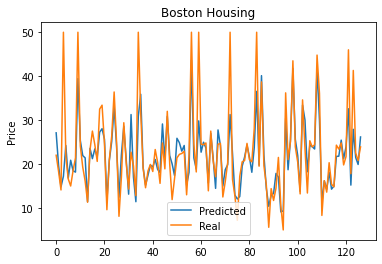

In [54]:
plt.plot(bosYPred)
plt.plot(bosYTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("Price")
plt.title("Boston Housing")
plt.show()

## Регрессионные модели

### Линейная регрессия (Linear Regression) - регрессия по методу наименьших квадратов

Формально решается оптимизационная задача подбора коэффицинтов $w = (w_1, w_2, \ldots, w_n)$ минимизации целевой функции различия предсказанных значений  $\mathbf{X}w$ и фактической зависимой переменной $y$:

$\displaystyle\min_{w}||\mathbf{X}w - y||_2^2$

In [93]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
dogs = animals[animals["class"] == "dog"][["weight","height"]].to_numpy()
norm = MinMaxScaler()
dogs = norm.fit_transform(dogs)
weight = dogs[:,1]
height = dogs[:,0].reshape(-1,1)

#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(height, weight)

#построение предсказания
weightPred = linReg.predict(height)

print(f"Параметры прямой: b0 = {linReg.intercept_}, наклон: {linReg.coef_[0]}")
print(f"y = {linReg.intercept_} + {linReg.coef_[0]} x")
print(f"Коэффициент детерминации R2: {linReg.score(height, weight)}")


Параметры прямой: b0 = 0.14208054462838304, наклон: 0.7200325918850387
y = 0.14208054462838304 + 0.7200325918850387 x
Коэффициент детерминации R2: 0.6396826675513356


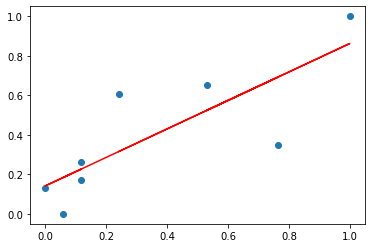

In [98]:
plt.scatter(height, weight)
plt.plot(height,weightPred, color="red")

plt.show()


### Гребневая регрессия (Ridge Regression)

Гребневая регрессия решает некоторые проблемы обычных методов наименьших квадратов, налагая штраф на размер коэффициентов. Коэффициенты гребня минимизируют оштрафованную остаточную сумму квадратов:

$\displaystyle\min_w||\mathbf{X}w - y||_2^2 + \alpha ||w||_2^2$

Данные метод направлен на снижение влияния корреляции между независимыми переменными. Часто возникает в моделях с большим числом параметров.


In [109]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(height, weight)

#построение предсказания
wRigPred = rig.predict(height)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")
print(f"Коэффициент детерминации R2: {rig.score(height, weight)}")

Параметры прямой: b0 = 0.22967254467366824, наклон: 0.4723712196156251
y = 0.22967254467366824 + 0.4723712196156251 x
Коэффициент детерминации R2: 0.5640034168452055


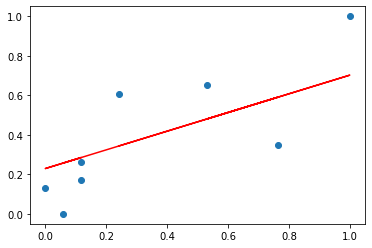

In [110]:
plt.scatter(height, weight)
plt.plot(height,wRigPred, color="red")

plt.show()


#### Установка параметра регуляризации

linear_model.RidgeCV выполняет подбор оптимального значения $\alpha$ на сетке с использованием кросс-валидации на GridSearchCV


In [107]:
rcv = linear_model.RidgeCV( alphas=np.logspace(-6, 6, 13) )
rcv.fit(height, weight)
rcv.alpha_

1e-06

### Лассо (Lasso)